# Data Analytics Group 8 Project

## Task 1

In [34]:
# Import Libraries
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold as sk
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.metrics import accuracy_score as acs

In [35]:
# Load the dataset
df = pd.read_csv('Group8_missingdata.csv')

# Display the entire dataframe
df = pd.DataFrame(dataframe)
df

Condition  Cylinder heating zone 1  Cylinder heating zone 4  \
0       Normal1                   275.34                   313.60   
1       Normal1                   278.37                   308.02   
2       Normal1                   280.96                   307.25   
3       Normal1                   303.12                   310.04   
4       Normal1                   272.50                   310.45   
..          ...                      ...                      ...   
120  Condition7                   264.73                   304.52   
121  Condition7                   264.73                   294.38   
122  Condition7                   285.79                   311.97   
123  Condition7                   278.30                   280.06   
124  Condition7                   283.27                   305.36   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1595.22                             86.79      29.210   
1                       1512.35                             88.90      29.428   
2                       1414.20                             88.70      29.456   
3                       1505.18                             89.44      28.406   
4                       1527.78                             92.53      28.806   
..                          ...                               ...         ...   
120                     1617.36                             87.75      27.124   
121                     1683.39                             84.92      30.734   
122                     1647.28                             93.85      29.394   
123                     1670.41                             87.79      28.762   
124                     1702.92                             89.56      27.882   

     Cylinder heating zone 5  Injection time  Cylinder heating zone 2  \
0                     307.46           0.234                   297.26   
1                     330.93           0.244                   290.58   
2                     288.25           0.224                   288.27   
3                     312.47           0.214                   307.81   
4                     307.39           0.234                   304.27   
..                       ...             ...                      ...   
120                   321.30           0.194                   279.70   
121                   321.30           0.194                   294.52   
122                   314.23           0.194                   283.53   
123                   319.86           0.194                   303.53   
124                   305.73           0.194                   296.33   

     Dosage time  Cylinder heating zone 3  Switch-over volume  \
0          2.946                   316.18             1.36334   
1          2.878                   319.03             1.47334   
2          2.878                   313.86             1.44334   
3          3.208                   296.75             1.49334   
4          3.098                   314.20             1.38334   
..           ...                      ...                 ...   
120        2.860                   313.18             1.39768   
121        2.960                   312.18             1.43768   
122        2.786                   304.61             1.48542   
123        2.976                   295.86             1.49542   
124        2.786                   304.88             1.46542   

     Material cushion  
0            0.978447  
1            0.999772  
2            0.879388  
3            0.976952  
4            0.879580  
..                ...  
120          0.894858  
121          0.878447  
122          0.891460  
123          0.932593  
124          0.941460  

[125 rows x 13 columns]

In [36]:
#Numbers of Nulls in each column
df.isnull().sum()

Condition                           0
Cylinder heating zone 1             0
Cylinder heating zone 4             0
Maximum injection pressure          0
Mould temperature control unit 1    0
Cycle time                          0
Cylinder heating zone 5             0
Injection time                      0
Cylinder heating zone 2             0
Dosage time                         0
Cylinder heating zone 3             0
Switch-over volume                  0
Material cushion                    0
dtype: int64

In [37]:
#Count the number of Nulls
df.isnull().sum().sum()

0

In [38]:
#sum the non-null values in each column of a DataFrame before
df[df.notnull()].sum()

Condition                           Normal1Normal1Normal1Normal1Normal1Normal1Norm...
Cylinder heating zone 1                                                      35058.33
Cylinder heating zone 4                                                      38721.47
Maximum injection pressure                                                  199500.31
Mould temperature control unit 1                                             11224.49
Cycle time                                                                   3621.698
Cylinder heating zone 5                                                      39183.99
Injection time                                                                  27.49
Cylinder heating zone 2                                                      36586.36
Dosage time                                                                   363.598
Cylinder heating zone 3                                                      38842.45
Switch-over volume                                    

In [39]:
#DataFrame using the forward-fill method
df_complete = df.fillna(method = 'ffill')
df_complete

Condition  Cylinder heating zone 1  Cylinder heating zone 4  \
0       Normal1                   275.34                   313.60   
1       Normal1                   278.37                   308.02   
2       Normal1                   280.96                   307.25   
3       Normal1                   303.12                   310.04   
4       Normal1                   272.50                   310.45   
..          ...                      ...                      ...   
120  Condition7                   264.73                   304.52   
121  Condition7                   264.73                   294.38   
122  Condition7                   285.79                   311.97   
123  Condition7                   278.30                   280.06   
124  Condition7                   283.27                   305.36   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1595.22                             86.79      29.210   
1                       1512.35                             88.90      29.428   
2                       1414.20                             88.70      29.456   
3                       1505.18                             89.44      28.406   
4                       1527.78                             92.53      28.806   
..                          ...                               ...         ...   
120                     1617.36                             87.75      27.124   
121                     1683.39                             84.92      30.734   
122                     1647.28                             93.85      29.394   
123                     1670.41                             87.79      28.762   
124                     1702.92                             89.56      27.882   

     Cylinder heating zone 5  Injection time  Cylinder heating zone 2  \
0                     307.46           0.234                   297.26   
1                     330.93           0.244                   290.58   
2                     288.25           0.224                   288.27   
3                     312.47           0.214                   307.81   
4                     307.39           0.234                   304.27   
..                       ...             ...                      ...   
120                   321.30           0.194                   279.70   
121                   321.30           0.194                   294.52   
122                   314.23           0.194                   283.53   
123                   319.86           0.194                   303.53   
124                   305.73           0.194                   296.33   

     Dosage time  Cylinder heating zone 3  Switch-over volume  \
0          2.946                   316.18             1.36334   
1          2.878                   319.03             1.47334   
2          2.878                   313.86             1.44334   
3          3.208                   296.75             1.49334   
4          3.098                   314.20             1.38334   
..           ...                      ...                 ...   
120        2.860                   313.18             1.39768   
121        2.960                   312.18             1.43768   
122        2.786                   304.61             1.48542   
123        2.976                   295.86             1.49542   
124        2.786                   304.88             1.46542   

     Material cushion  
0            0.978447  
1            0.999772  
2            0.879388  
3            0.976952  
4            0.879580  
..                ...  
120          0.894858  
121          0.878447  
122          0.891460  
123          0.932593  
124          0.941460  

[125 rows x 13 columns]

In [40]:
df_complete.isnull().sum()

Condition                           0
Cylinder heating zone 1             0
Cylinder heating zone 4             0
Maximum injection pressure          0
Mould temperature control unit 1    0
Cycle time                          0
Cylinder heating zone 5             0
Injection time                      0
Cylinder heating zone 2             0
Dosage time                         0
Cylinder heating zone 3             0
Switch-over volume                  0
Material cushion                    0
dtype: int64

In [41]:
df_complete[df_complete.notnull()].sum()

Condition                           Normal1Normal1Normal1Normal1Normal1Normal1Norm...
Cylinder heating zone 1                                                      35058.33
Cylinder heating zone 4                                                      38721.47
Maximum injection pressure                                                  199500.31
Mould temperature control unit 1                                             11224.49
Cycle time                                                                   3621.698
Cylinder heating zone 5                                                      39183.99
Injection time                                                                  27.49
Cylinder heating zone 2                                                      36586.36
Dosage time                                                                   363.598
Cylinder heating zone 3                                                      38842.45
Switch-over volume                                    

## Task 2: Statistical Analysis

In [42]:
#Calculating Mean
df_sort = df_complete.groupby(['Condition'])
df_sort.mean()

Cylinder heating zone 1  Cylinder heating zone 4  \
Condition                                                      
Condition3               282.249000               311.905750   
Condition7               277.690571               304.009143   
Normal1                  280.984000               312.098400   

            Maximum injection pressure  Mould temperature control unit 1  \
Condition                                                                  
Condition3                   1545.0450                         89.407000   
Condition7                   1732.1920                         91.256571   
Normal1                      1541.4358                         89.084600   

            Cycle time  Cylinder heating zone 5  Injection time  \
Condition                                                         
Condition3   28.660500               312.891750         0.22925   
Condition7   29.276971               312.780857         0.19400   
Normal1      29.011680               314.419800         0.23060   

            Cylinder heating zone 2  Dosage time  Cylinder heating zone 3  \
Condition                                                                   
Condition3               293.329000     2.896800               310.660500   
Condition7               292.164286     2.860686               311.614286   
Normal1                  292.549000     2.952040               310.190600   

            Switch-over volume  Material cushion  
Condition                                         
Condition3            1.562309          1.035941  
Condition7            1.396491          0.899294  
Normal1               1.409940          0.945360

In [43]:
#Calclating Median
df_sort.median()

Cylinder heating zone 1  Cylinder heating zone 4  \
Condition                                                      
Condition3                   283.64                  311.235   
Condition7                   277.03                  305.360   
Normal1                      281.21                  312.940   

            Maximum injection pressure  Mould temperature control unit 1  \
Condition                                                                  
Condition3                    1528.130                            89.600   
Condition7                    1724.890                            91.740   
Normal1                       1534.305                            88.975   

            Cycle time  Cylinder heating zone 5  Injection time  \
Condition                                                         
Condition3      28.845                  311.905           0.228   
Condition7      29.208                  312.180           0.194   
Normal1         29.014                  312.925           0.234   

            Cylinder heating zone 2  Dosage time  Cylinder heating zone 3  \
Condition                                                                   
Condition3                   292.39        2.895                   309.42   
Condition7                   292.57        2.832                   312.56   
Normal1                      290.50        2.937                   313.19   

            Switch-over volume  Material cushion  
Condition                                         
Condition3             1.54397          1.030480  
Condition7             1.40542          0.900328  
Normal1                1.41334          0.941568

In [44]:
#Range
df_sort.max() - df_sort.min()

Cylinder heating zone 1  Cylinder heating zone 4  \
Condition                                                      
Condition3                    43.46                    53.30   
Condition7                    43.45                    53.41   
Normal1                       46.62                    50.93   

            Maximum injection pressure  Mould temperature control unit 1  \
Condition                                                                  
Condition3                      249.90                             15.19   
Condition7                      264.34                             12.72   
Normal1                         281.72                             15.55   

            Cycle time  Cylinder heating zone 5  Injection time  \
Condition                                                         
Condition3       3.832                    51.75            0.04   
Condition7       4.440                    45.67            0.00   
Normal1          4.678                    48.40            0.04   

            Cylinder heating zone 2  Dosage time  Cylinder heating zone 3  \
Condition                                                                   
Condition3                    46.61        0.566                    43.24   
Condition7                    47.68        0.454                    54.72   
Normal1                       53.78        0.504                    46.08   

            Switch-over volume  Material cushion  
Condition                                         
Condition3             0.25113          0.161330  
Condition7             0.21887          0.142265  
Normal1                0.24000          0.161346

In [45]:
#Std deviation
df_sort.std()

Cylinder heating zone 1  Cylinder heating zone 4  \
Condition                                                      
Condition3                11.967916                12.686466   
Condition7                10.856160                11.164084   
Normal1                   10.872212                10.204714   

            Maximum injection pressure  Mould temperature control unit 1  \
Condition                                                                  
Condition3                   62.555502                          3.614216   
Condition7                   72.586872                          3.304104   
Normal1                      72.696523                          3.970643   

            Cycle time  Cylinder heating zone 5  Injection time  \
Condition                                                         
Condition3    0.905807                12.843601        0.012234   
Condition7    1.043394                11.128386        0.000000   
Normal1       1.258319                12.864317        0.011537   

            Cylinder heating zone 2  Dosage time  Cylinder heating zone 3  \
Condition                                                                   
Condition3                11.706254     0.147840                12.413777   
Condition7                11.746317     0.111778                14.123749   
Normal1                   11.373540     0.148282                11.358917   

            Switch-over volume  Material cushion  
Condition                                         
Condition3            0.070189          0.042397  
Condition7            0.056410          0.038197  
Normal1               0.062649          0.036907

## Task 3

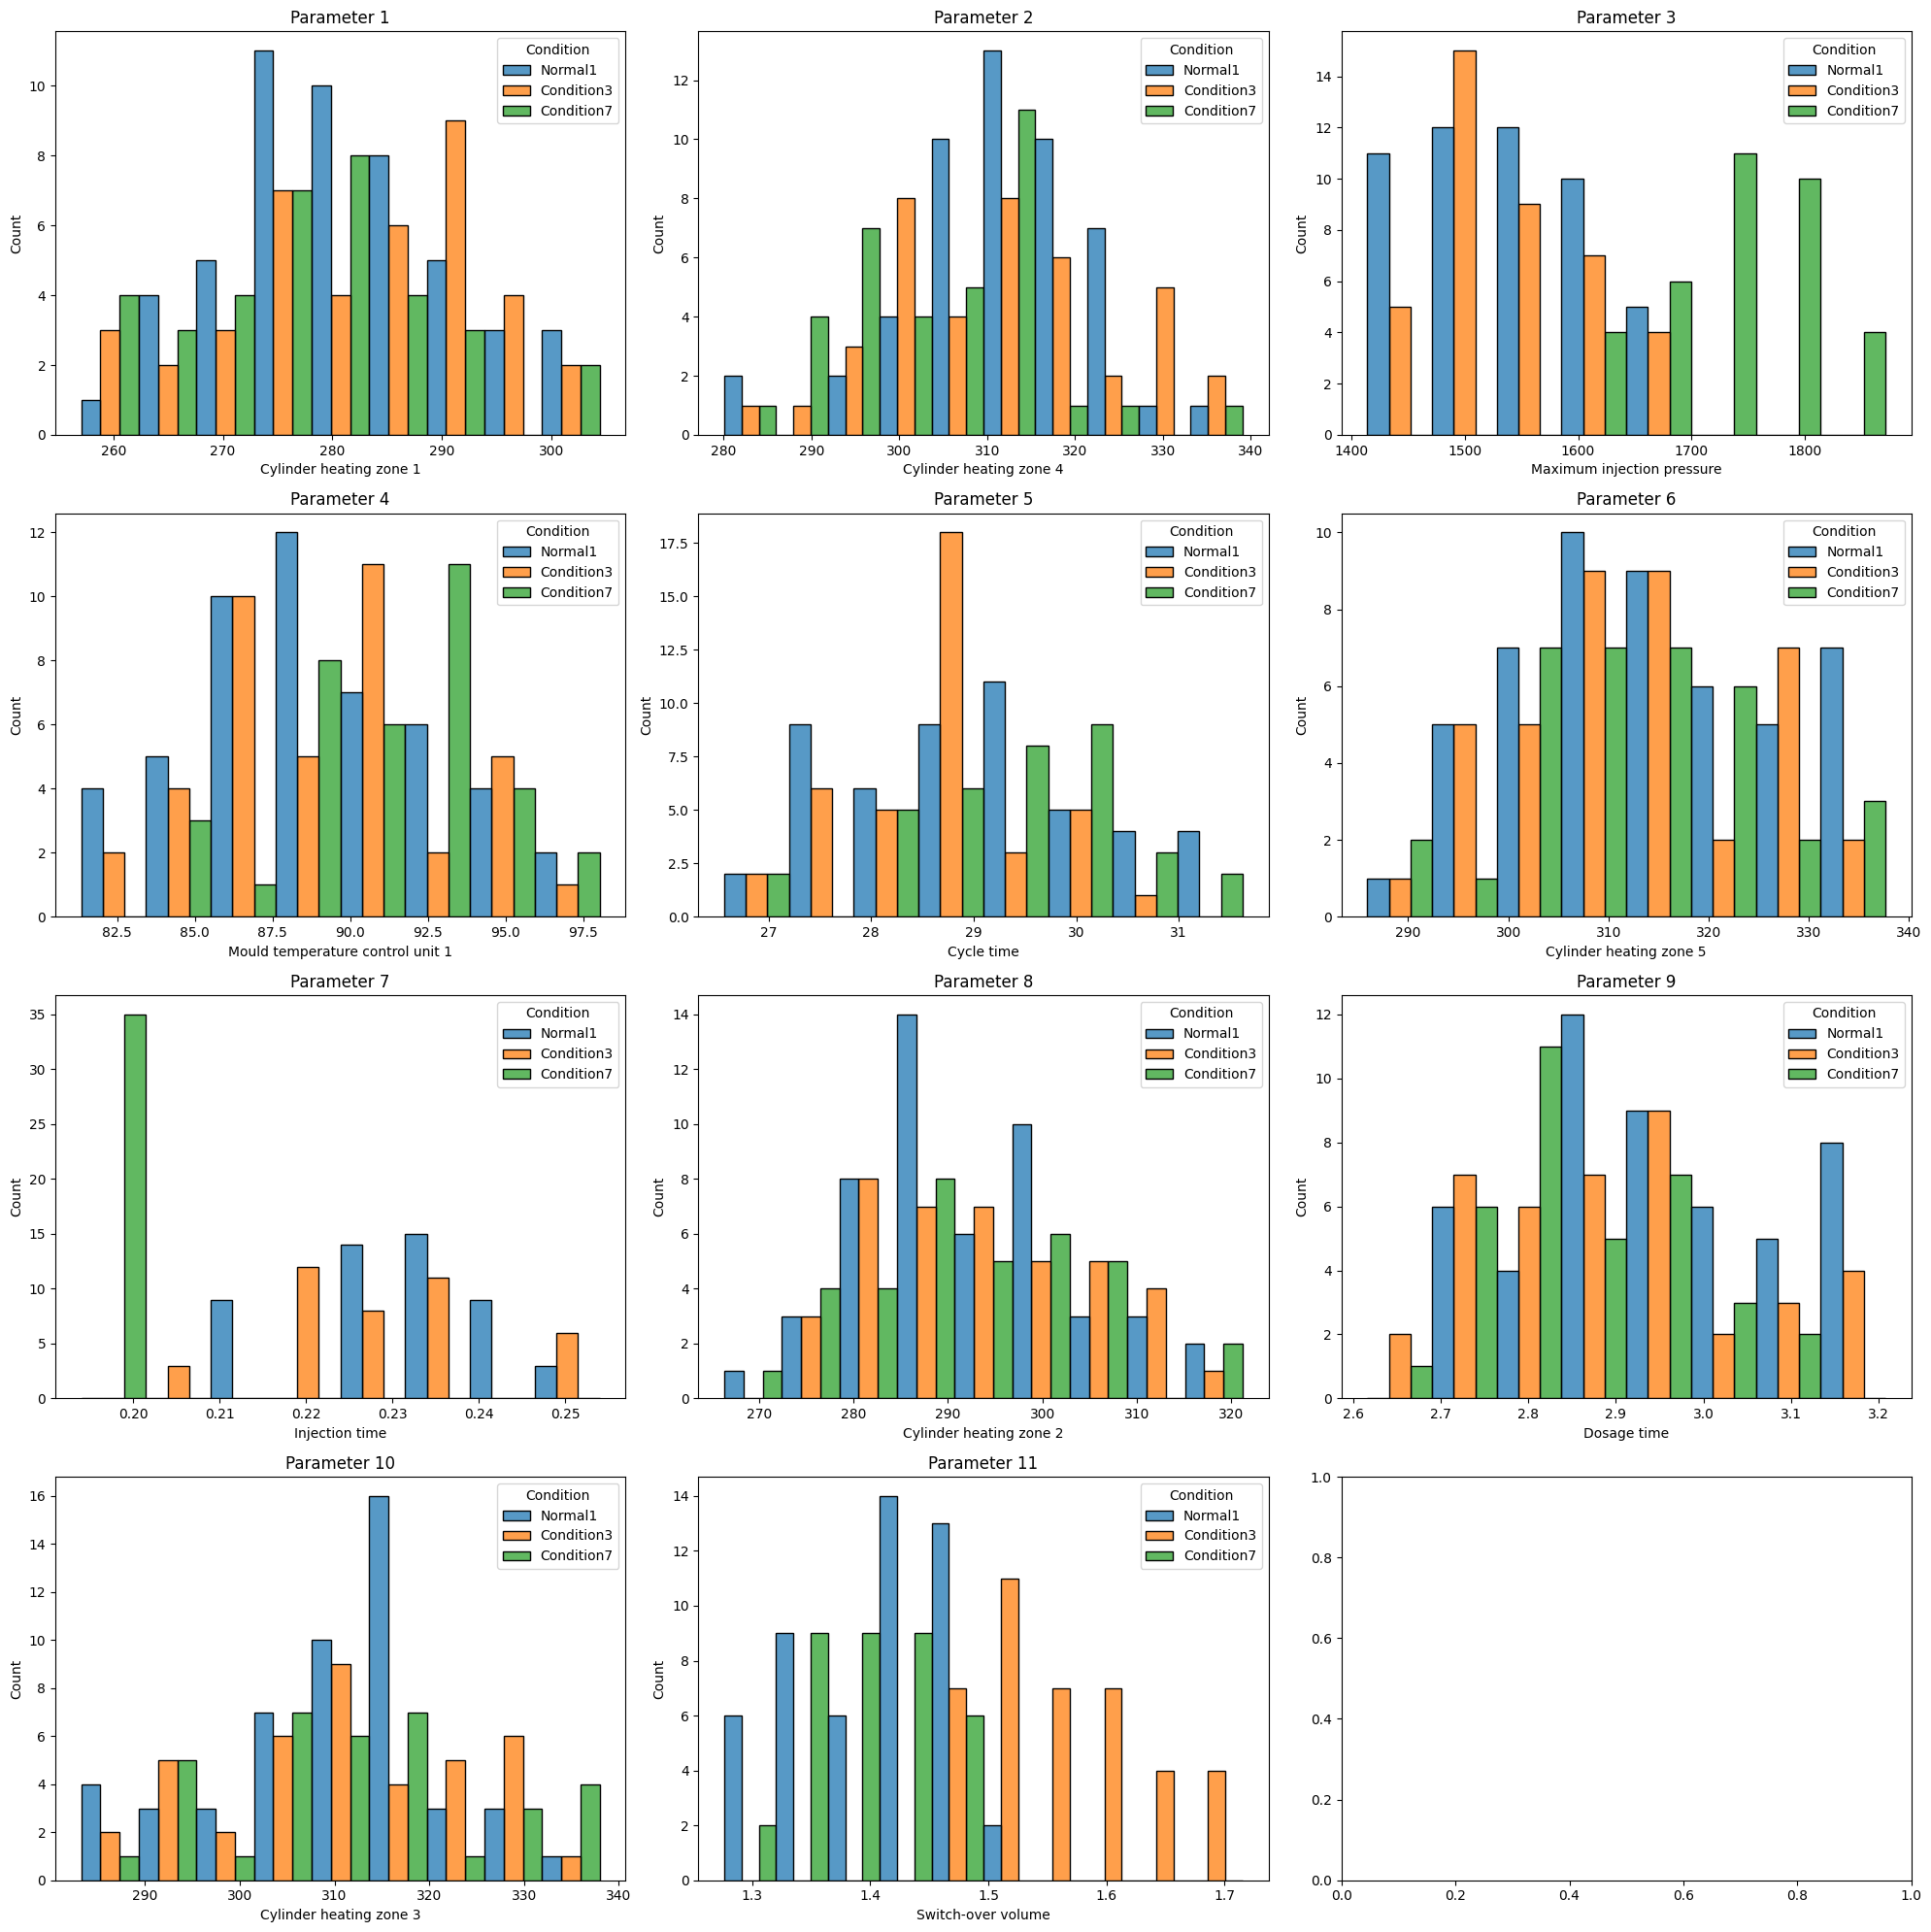

In [75]:
#set parameters.
parameters = df_complete.columns[1:-1]

fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for i, param in enumerate(parameters):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(df_complete, x=param, ax=ax, hue='Condition', multiple='dodge').set(title='Parameter ' + str(i + 1))

plt.tight_layout()
plt.show()

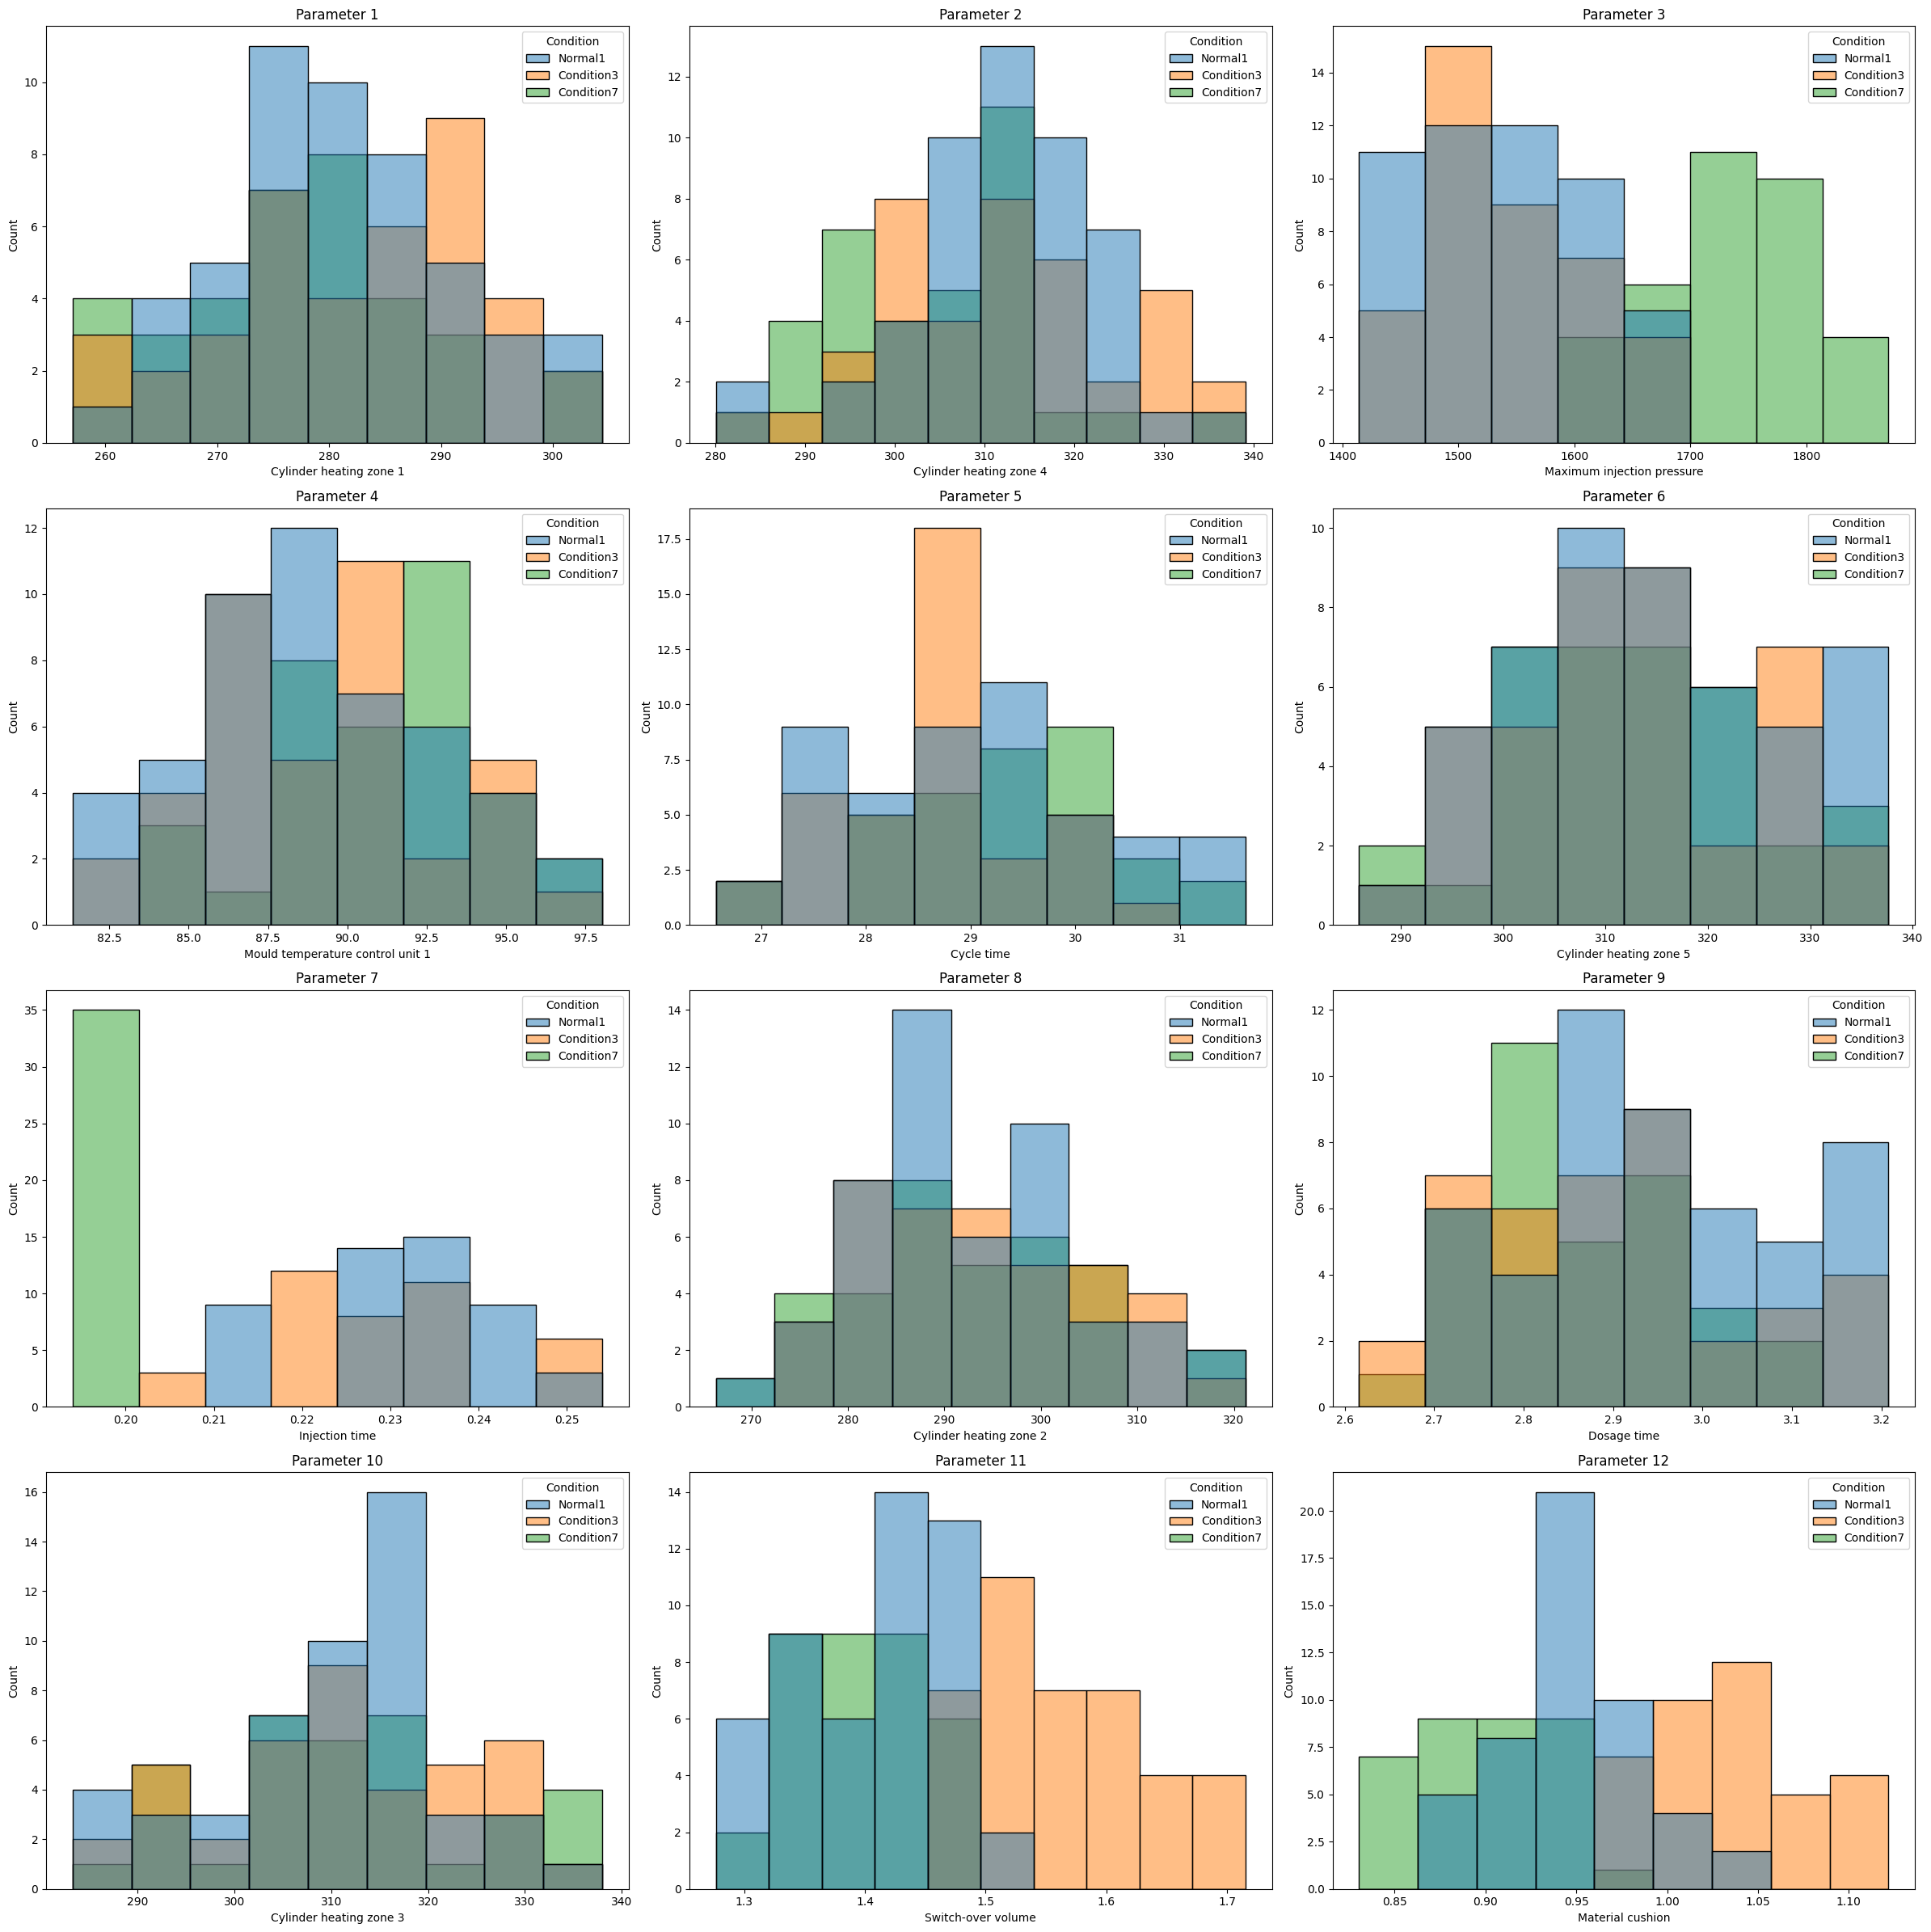

In [47]:
#fig, axes = plt.subplots(4, 3, figsize=(24, 24))

parameters = [
    'Cylinder heating zone 1',
    'Cylinder heating zone 4',
    'Maximum injection pressure',
    'Mould temperature control unit 1',
    'Cycle time',
    'Cylinder heating zone 5',
    'Injection time',
    'Cylinder heating zone 2',
    'Dosage time',
    'Cylinder heating zone 3',
    'Switch-over volume',
    'Material cushion'
]

for i, param in enumerate(parameters):
    ax = axes.flatten()[i]
    sns.histplot(dataframe, x=param, ax=ax, hue='Condition')
    ax.set(title=f'Parameter {i + 1}')

plt.tight_layout()
plt.show()


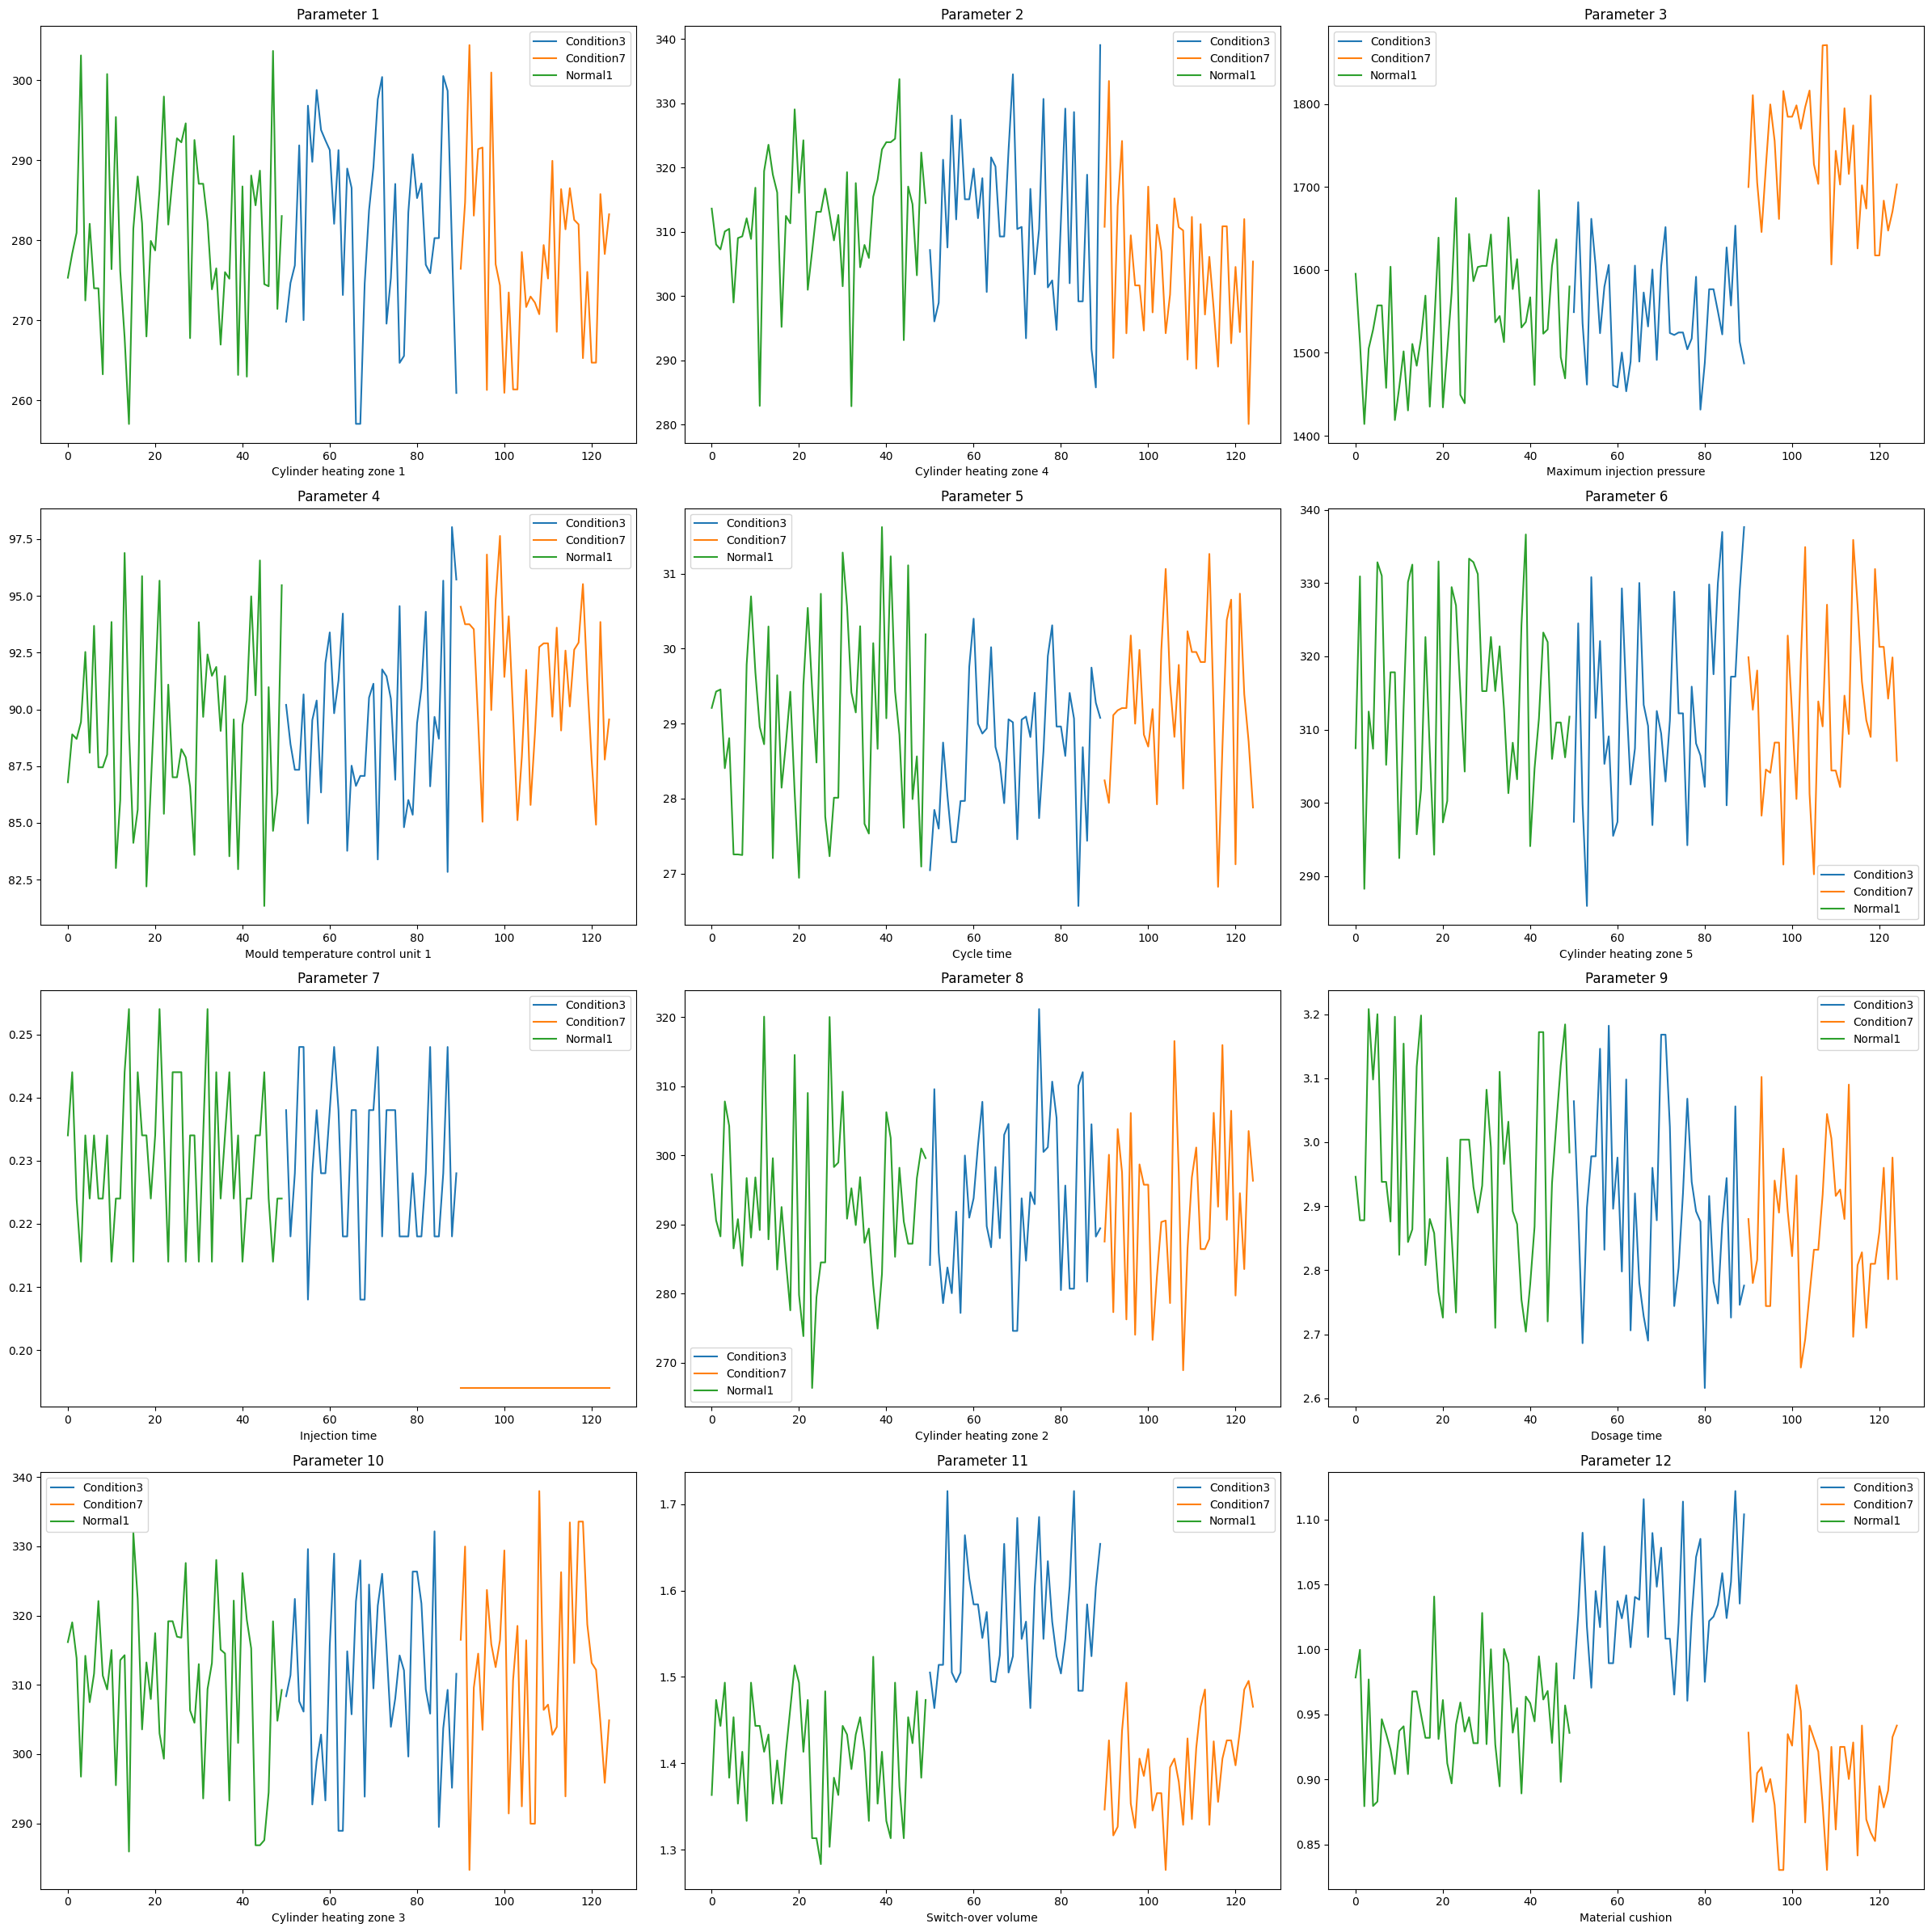

In [48]:
fig, axes = plt.subplots(4, 3, figsize=(24, 24))

parameters = [
    'Cylinder heating zone 1',
    'Cylinder heating zone 4',
    'Maximum injection pressure',
    'Mould temperature control unit 1',
    'Cycle time',
    'Cylinder heating zone 5',
    'Injection time',
    'Cylinder heating zone 2',
    'Dosage time',
    'Cylinder heating zone 3',
    'Switch-over volume',
    'Material cushion'
]

for i, param in enumerate(parameters):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    dataframe.groupby('Condition')[param].plot(xlabel=param, ax=ax, title=f'Parameter {i + 1}', legend=True)

plt.tight_layout()
plt.show()


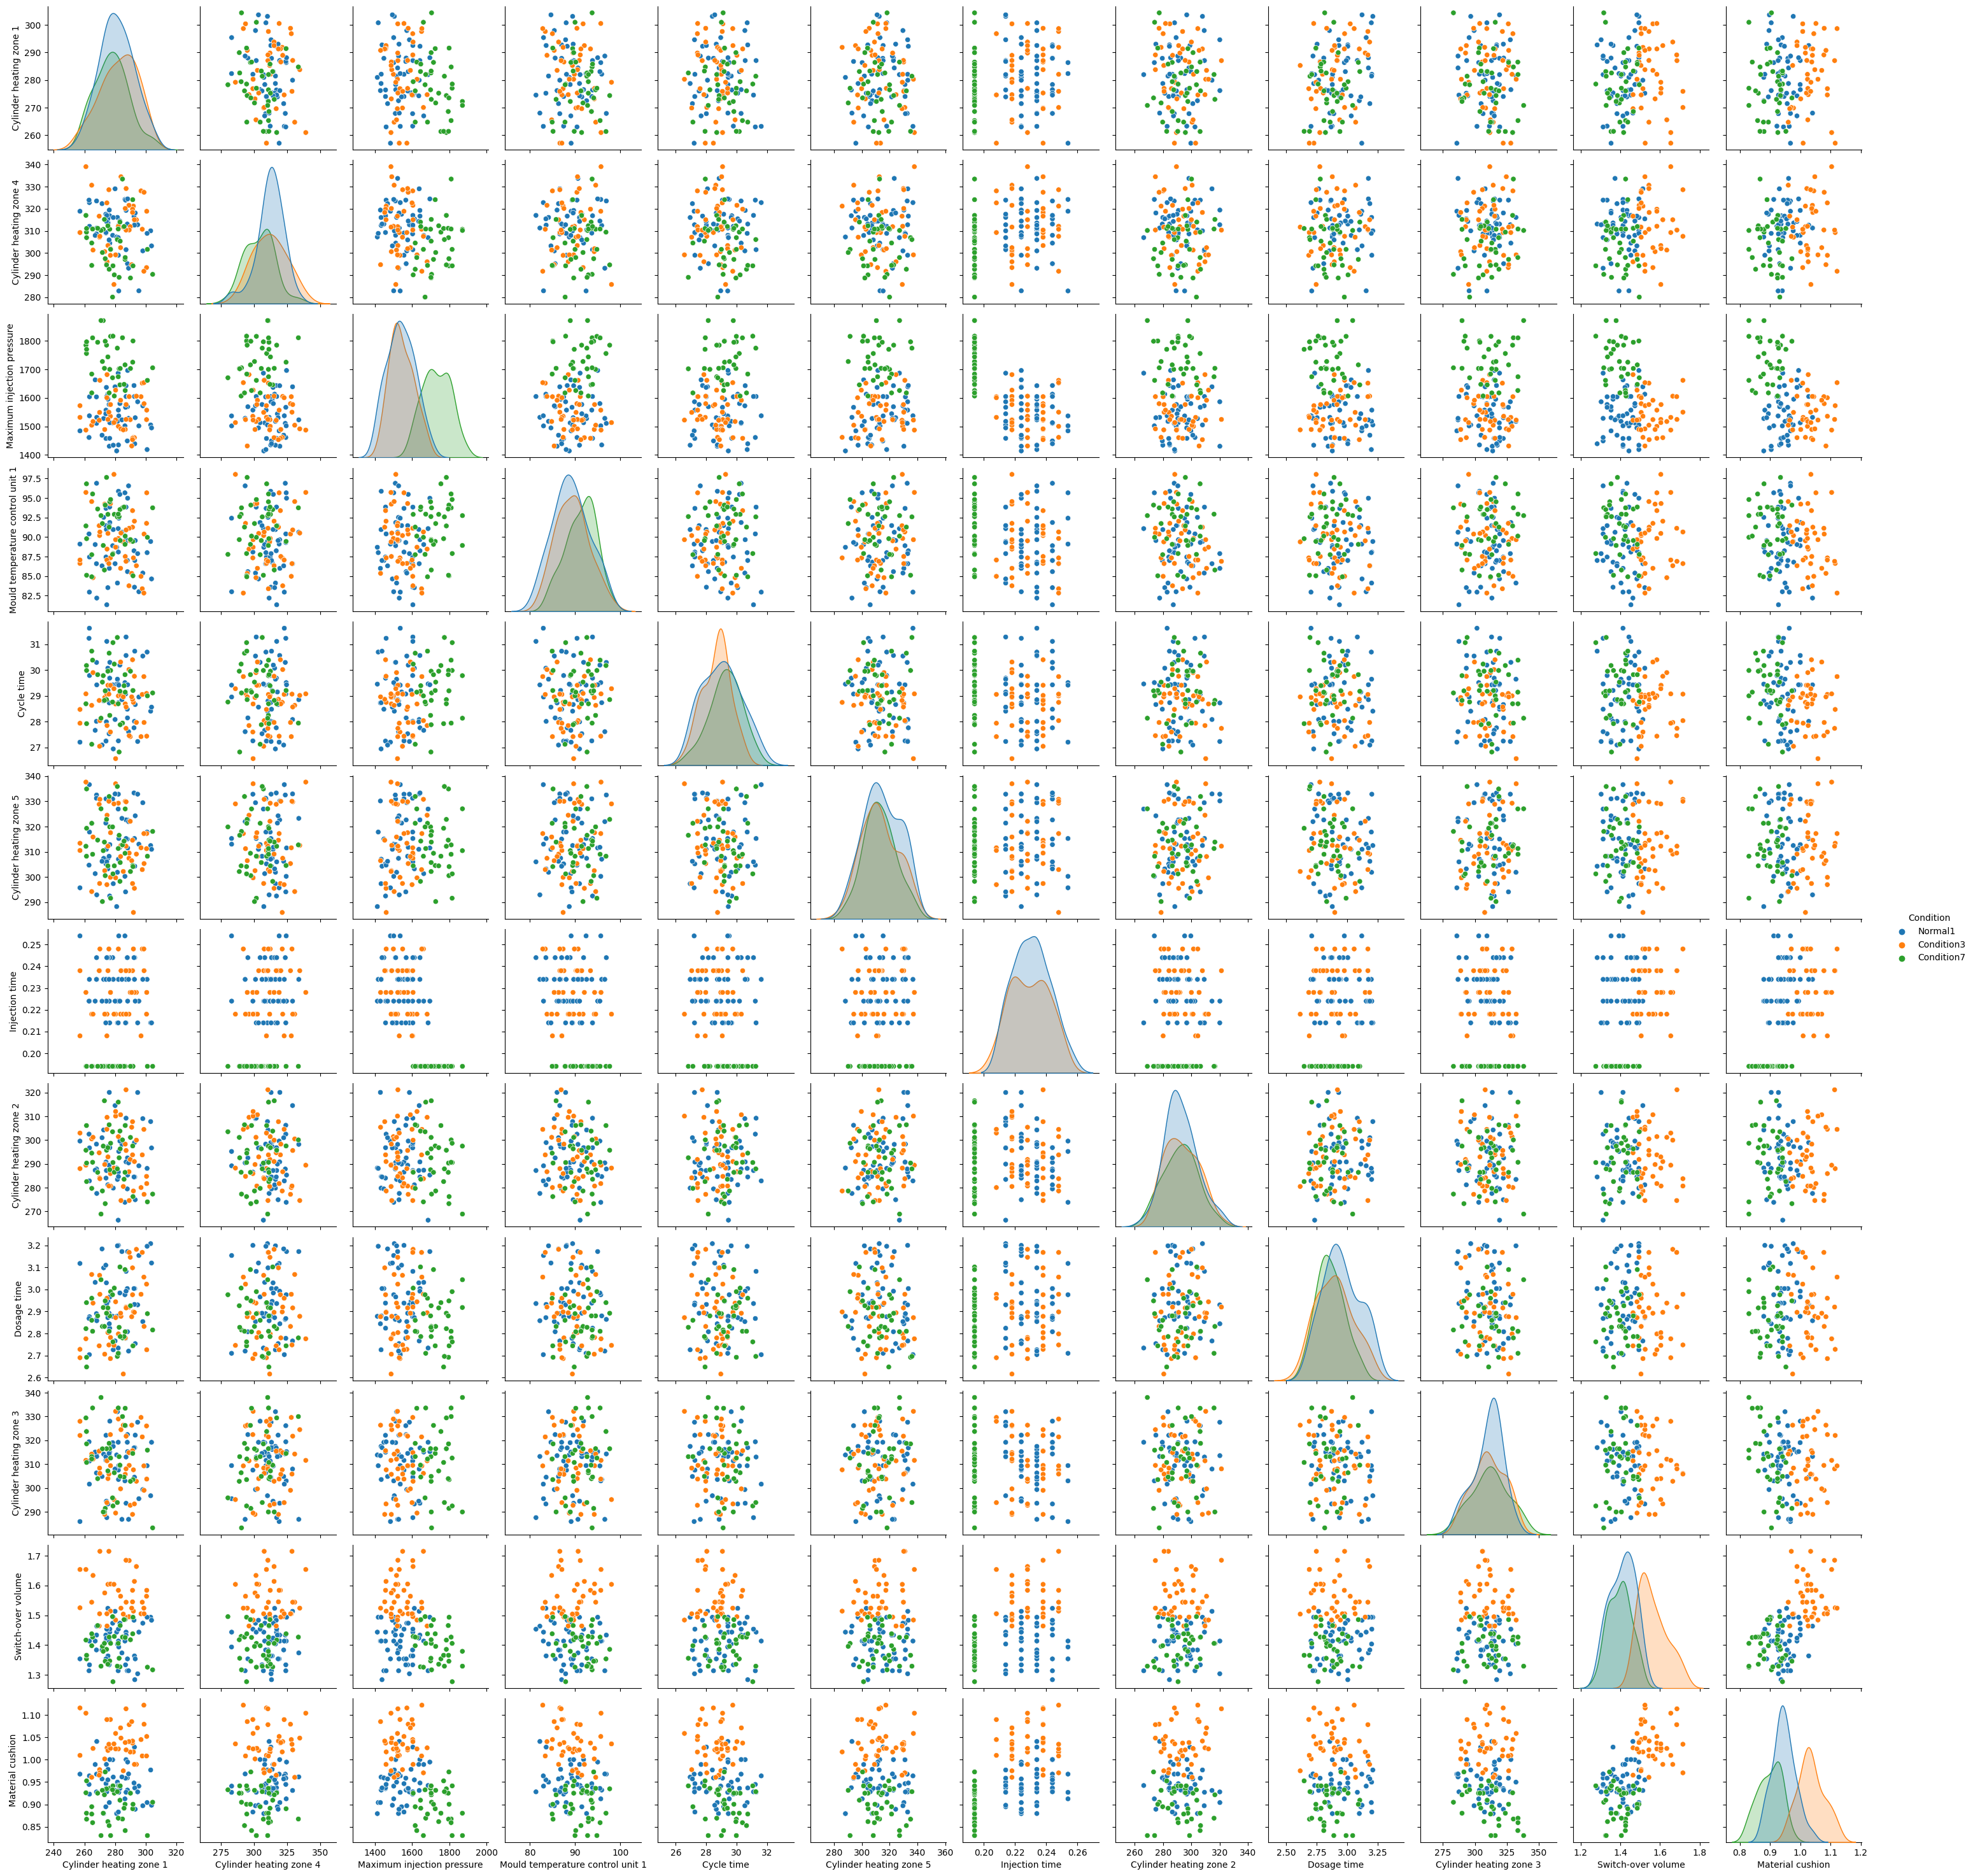

In [49]:
#Pairplot

sns.pairplot(dataframe, hue='Condition')

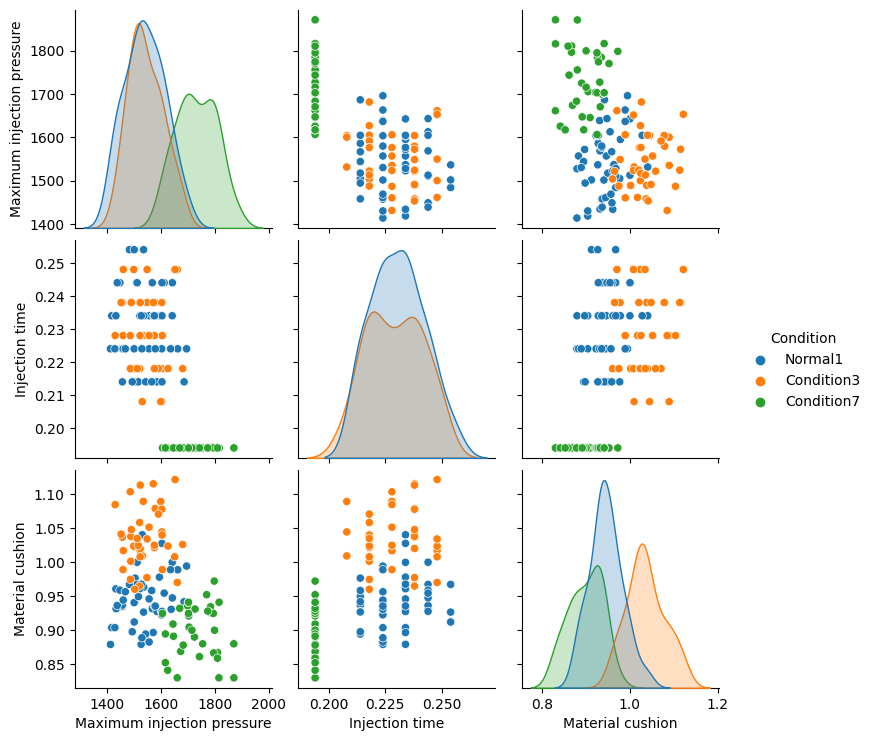

In [50]:
#Pairplot, important factors

sns.pairplot(dataframe, vars=["Maximum injection pressure",'Injection time','Material cushion'], hue='Condition')

## Task 4

In [51]:
# Load data
# X is features, Y is target

# Parameter values in an array
x = dataframe.iloc[:,1:]
# Parameters in dataframe
X = pd.DataFrame(x)
#print(x)
print(X)

# Conditons in array
y = dataframe.iloc[:,0]
# Conditions in dataframe
Y = pd.DataFrame(y)
#print(Y)

#Place the list of parameter into Parameter_names
Parameter_names = list(dataframe)
print(Parameter_names)

#Place the different conditions into Target_names
Target_names = dataframe['Condition'].unique()
print(Target_names)

     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     275.34                   313.60   
1                     278.37                   308.02   
2                     280.96                   307.25   
3                     303.12                   310.04   
4                     272.50                   310.45   
..                       ...                      ...   
120                   264.73                   304.52   
121                   264.73                   294.38   
122                   285.79                   311.97   
123                   278.30                   280.06   
124                   283.27                   305.36   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1595.22                             86.79      29.210   
1                       1512.35                             88.90      29.428   
2                       1414.20                             88.70      2

In [52]:
#define decision model
model_name = 'Decision Tree'
model2 = dt(random_state=0)

#split orginal data into 5 subsets fold -kfold function
cv = sk(n_splits=5, shuffle=True, random_state=42)
# accuracy list
accuracy_l = []
# result list
result_matrix =[]

# create save path
path = os.getcwd()
savePath = path + '/results'
print(savePath)

/content/results


In [53]:
# Split data using StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy and result information
accuracy_l = []
result_matrix = []

for tr_i, te_i in cv.split(X, Y):
    X_tr = X.iloc[tr_i]
    X_v = X.iloc[te_i]
    y_tr = Y.iloc[tr_i]
    y_v = Y.iloc[te_i]

    print("Training dataset:", len(y_tr))
    print("Testing dataset:", len(y_v))

    # Fit decision tree model and predict y_p
    decision_tree = DecisionTreeClassifier(random_state=num1)
    model = decision_tree.fit(X_tr, y_tr)
    y_p = model.predict(X_v)

    # Calculate accuracy
    accuracy = accuracy_score(y_v, y_p).round(2)
    print("Accuracy:", accuracy)
    print()

    accuracy_l.append(accuracy)

    # Plot and save decision tree
    fig = plt.figure(figsize=(20, 15))
    tree.plot_tree(model, feature_names=Parameter_names, class_names=Target_names, filled=True)
    plt.savefig(savePath + 'Dylancool' + str(len(accuracy_l)) + '_decision_tree.png')

    # Plot and save confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_v, y_p), annot=True, fmt='d', cmap='Blues')
    plt.tight_layout()
    plt.savefig(savePath + '/Dylancool' + str(len(accuracy_l)) + '_confusion_matrix.png')

    # Reset the labels and save the test data + predictions
    X_v.reset_index(drop=True, inplace=True)
    y_v.reset_index(drop=True, inplace=True)
    result_matrix = pd.concat([X_v, y_v], axis=1, ignore_index=True)
    result_matrix.loc[:, 13] = y_p
    result_matrix.to_csv(savePath + '/cv_' + str(len(accuracy_l)) + '.csv', index=False)


NameError: ignored

In [ ]:
###  Mean accuracy score
m_sc = round(np.mean(accuracy_l), 2)
print('%s score :  %s' % (model_name, "{:.2f}".format(m_sc)))

1. make code like profs
2. include correlation matrix
3. include accuracy score for decision tree
4. why important factor is those 3?
5. does the n_splits and random_state value matter?
